# Analyzing image data with NumPy
<font color = emerald>Jessica Reyes<font>

In [2]:
import numpy as np
import matplotlib.pylab as plt

Images are easy to work with using NumPy since an image is just an array.  First let's create a local copy:

In [2]:
import requests
url="https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/image.png"
r = requests.get(url)
open('image.png', 'wb').write(r.content)

505998

Now we can read it:

In [3]:
image = plt.imread('image.png')
type(image)

numpy.ndarray

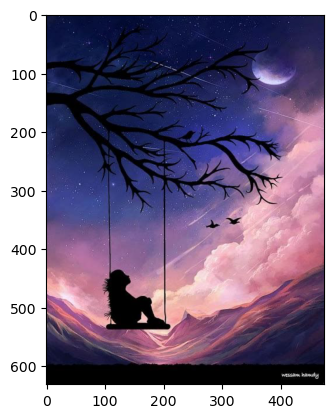

In [4]:
plt.imshow(image);

In [5]:
image.shape

(631, 474, 4)

## Image Data type

Images can be encoded using different array types, typically

uint8 :  0 to 255

float32 : 0 to 1

Let's check which representation is used in the image we just read:

In [6]:
print(image.dtype)

float32


In [7]:
np.min(image),np.max(image)

(0.0, 1.0)

## The representation of images

The first two dimensions of the image represent its height and width.  The third dimension represents pixel-level information:  either grayscale intensity for black-and white images, or color information for color images.  Color is usually represented by three numbers that provide its [RGB](https://en.wikipedia.org/wiki/RGB_color_model) intensity numbers for red, green, and blue.
Our image is an RGBA image so it consists of four channels.
The last channel in RGBA images contains information about the opacity of each pixel.

In [8]:
print(image[179, 49])

[0.10196079 0.1254902  0.21960784 1.        ]


## Visualizing individual channels

We can visualize individual channels of our image.  As an example, let's visualize the red channel:

In [9]:
im_r = image.copy()
im_r[:, :, (1, 2)] = 0

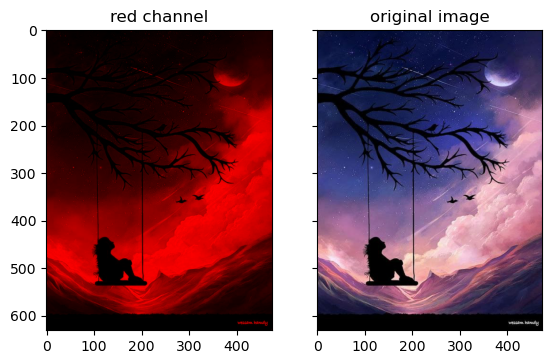

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(im_r)
ax1.set_title('red channel')
ax2.imshow(image)
ax2.set_title('original image');

We can also visualize individual channels as grey-scale images:

In [11]:
im2 = image[:,:,0]

In [12]:
im2.shape

(631, 474)

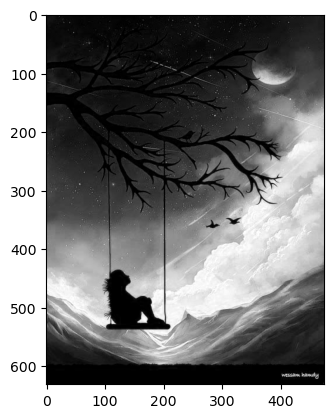

In [13]:
plt.imshow(image[:,:,0], cmap="gray");

The opacity channel of this image is very boring:

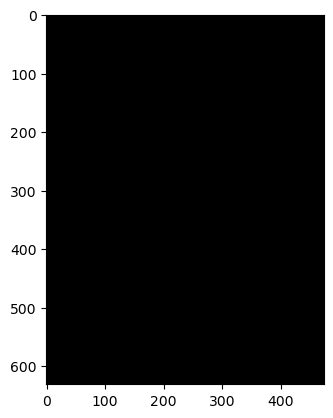

In [14]:
plt.imshow(image[:,:,3], cmap="gray");

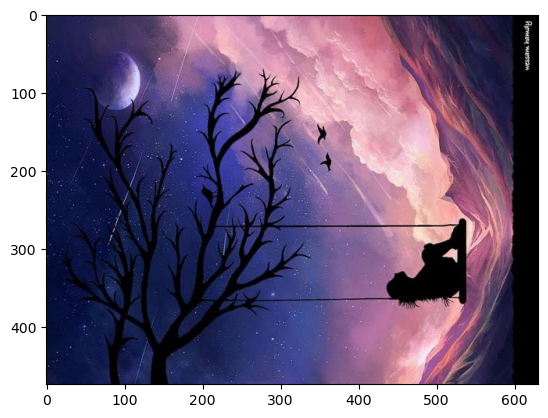

In [15]:
im90 = np.rot90(image)
plt.imshow(im90);

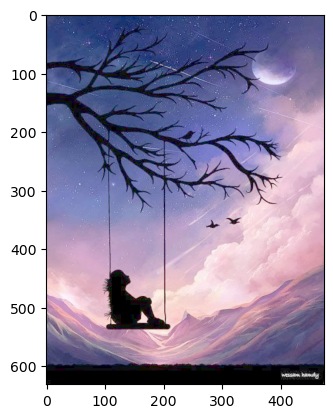

In [16]:
gamma = 0.5
# apply gamma correction:
gamma_corrected = image**gamma
plt.imshow(gamma_corrected);

### Exercises:

In each of the following exercises, plot the result to see that it works correctly.

* Convert the image to greyscale by averaging the color channels for each pixel.  One way to do so is using the following command:
```Python
gray=(image[:,:,0]+image[:,:,1]+image[:,:,2])/3
```
In your solution, please use `np.mean` instead!

In [17]:
# first we will re-read the image:
url="https://www.cs.colostate.edu/~asa/courses/dsci235/spr21/data/image.png"
r = requests.get(url)
open('image.png', 'wb').write(r.content)
image = plt.imread('image.png')

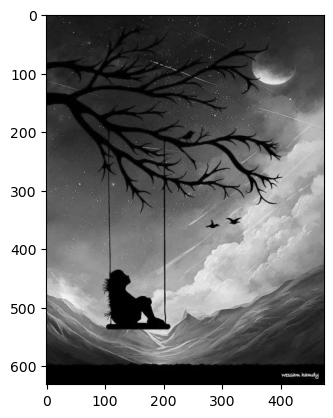

In [18]:
gray = np.mean(image, axis=2)
plt.imshow(gray, cmap="gray");

* Binarize the greyscale image by setting all pixels that have a value greater than a threshold to 1, and the rest to 0.


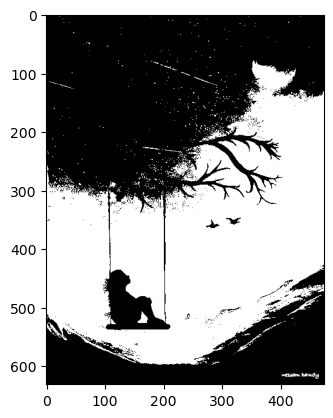

In [19]:
gray_thresh = gray > 0.5
plt.imshow(gray_thresh, cmap="gray");

* In the given image each channel is a floating point number between 0 and 1.  Convert the image to integers between 0 and 255 and have the dtype be 'uint8'.  Use the [astype](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.astype.html) method that copies and casts to a specific type.

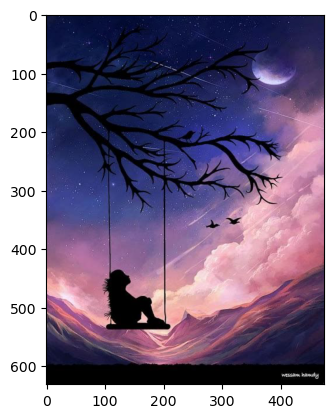

In [20]:
image_int = (image*255).astype('uint8')
image_int.dtype
plt.imshow(image_int);


* Add a white band of 20 pixels around the image 

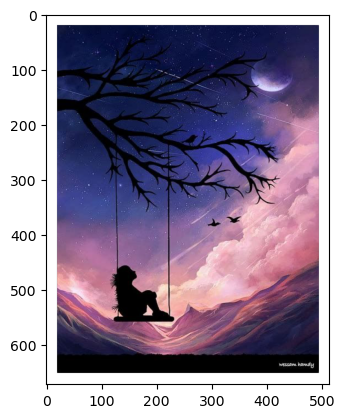

In [21]:
border_size = 20

new_image = np.zeros((image.shape[0]+2*border_size, image.shape[1]+2*border_size, image.shape[2]), dtype=image.dtype)
new_image[border_size:border_size+image.shape[0], border_size:border_size+image.shape[1]] = image
plt.imshow(new_image);

### Exercise:  denoising images

In this exercise we will consider the problem of denoising images. You will be asked to implement a very simple method for this task.  To motivate it we'll construct an image which is all black except for some noisy pixels inserted at random:

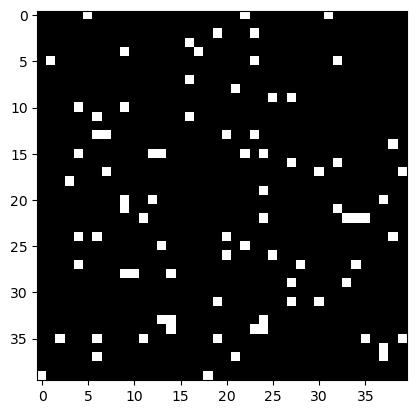

In [3]:
rng = np.random.default_rng(42)
noise = rng.binomial(1, 0.05, size=(40,40))
import matplotlib.pylab as plt
plt.imshow(noise, cmap="gray");

You will notice that most of the noise pixels (pixels with value = 1) are isolated:  all of their immediate four neighbors (immediately above, below, right or left) are black (pixel value = 0).  Write a function that receives a black and white image and sets the value of all isolated noise pixels to 0. The code shown in the notebook describing the "Game of Life" should give you a good idea on how to do this.

In [4]:
def remove_noise(image):
    denoised = image.copy()
    # fill in this function
    for i in range(denoised.shape[0]):
        for j in range(denoised.shape[1]):
          if denoised[i,j] == 1:
            if ((i > 0 and denoised[i-1,j] == 0) or (i < denoised.shape[0]-1 and denoised[i+1,j] == 0)
            or (j > 0 and denoised[i,j-1] == 0) or (j < denoised.shape[1]-1 and denoised[i,j+1] == 0)):
              denoised[i,j] = 0
    return denoised

In [5]:
# code for generating a grayscale conversion of the image
rng = np.random.default_rng(42)
noise = rng.uniform(0, 1, size=(40, 40))

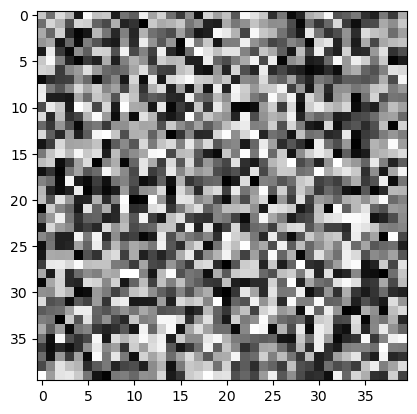

In [6]:
plt.imshow(remove_noise(noise), cmap="gray");
# of course it's not working yet because we haven't written any code!